In [36]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Bayes' Theorem

How to update the probability of an event occuring (A) when you receive new information(B). Bayes' Theorem focuses on two numbers: the "prior" probability and the "posterior" probability.

### Prior

The "prior" is also called the base rate. Daniel Kahneman called it the "outside view" in his book *Thinking Fast and Slow*. It's the probability of something happening with very little additional information or context. Examples include:

- The probability of someone having a specific type of cancer
- The probability of a recession in a given year
- The probability of a rainy day in December

"Proportion" might be a be better way of thinking of it; you're not really calculating anything -- you're just looking at historical data.

### Posterior

The posterior is your "revised" probability after obtaining additional relevant information.

### Formula

The formula for Bayes' Theorem is:

$$ P(A \mid B) = \frac{P(B \mid A) \,* P(A)}{P(B)} $$

---
Where A is your prior probability and B is the new information you obtained. The pipe character should read as "given" (probability of A given B, etc.)

$ P(A \mid B) $ is your posterior probability.

It turns out this is a really useful way to make sense of the world and your experiences. Here's my favorite online calculator if you want to do it without Python:

https://ludios.org/bayes/

# Example 1

Only 1% of women at age forty who participate in a routine mammography test have breast cancer.

80% of women who have breast cancer will get positive mammographies, but 9.6% of women who don’t have breast cancer will also get positive mammographies.

A woman of this age had a positive mammography in a routine screening. What is the probability that she actually has breast cancer?

In [24]:
# P(A)
prior = .01

# Positive results
false_positive = 0.99 * 0.096
true_positive = 0.01 * 0.8

event =  false_positive + true_positive

# "80% of women who have breast cancer will get positive mammographies"
# P(B|A)
probability_of_event_given_prior_is_true = .8

# P(A | B)
posterior = \
(probability_of_event_given_prior_is_true * prior)/event

posterior

0.07763975155279504

What about if you get a negative test? What's the probability you're cancer-free?

$$ P(A \mid B) = \frac{P(B \mid A) \,* P(A)}{P(B)} $$

In [13]:
# Just creating these strings for readability
A = 'cancer-free'
B = 'negative test'

prior = .99

# Negative result
false_negative = .01 * .20
true_negative = .99 * .904

# Slightly different variable names this time
# (Good for helping you pay attention!)

# Negative test given you're cancer free
b_given_a = .904
p_a = .99
p_b = false_negative + true_negative

posterior =\
(b_given_a * p_a)/p_b

posterior

0.9977702461648233

# Pearls

Suppose that a barrel contains many small plastic eggs. Some eggs are painted red and some are painted blue. 40% of the eggs in the bin contain pearls, and 60% contain nothing. 30% of eggs containing pearls are painted blue, and 10% of eggs containing nothing are painted blue. What is the probability that a blue egg contains a pearl?

$$ P(A \mid B) = \frac{P(B \mid A) \,* P(A)}{P(B)} $$

In [ ]:
A = 'Pearl'
B = 'Blue'

b_given_a = .3
p_a = .4
p_b

In [30]:


# Eggs containing pearls
prior = .40

# Of those with pearls, which ones are blue?
b_given_a = .3

# Of those without pearls, which ones are blue?
b_given_NOT_a = .1

# Now I'm calculating these programatically, but it's the
# exact same thing as above where we hard-coded it
true_positive = b_given_a * prior
false_positive = b_given_NOT_a * (1-prior)

p_b = true_positive + false_positive

posterior =\
(true_positive)/\
(p_b)

posterior

0.6666666666666666

Notice that Bayes' Theorem is just saying "What's the probability that $A$ is true, given all the universes in which $B$ happened?"

Let's turn it into a function...

In [31]:
def bayes(prior, b_given_a, b_given_NOT_a):
    prior = prior
    probability_of_event_given_prior_is_true = b_given_a
    probability_of_event_given_prior_is_NOT_true = b_given_NOT_a

    true_positive = probability_of_event_given_prior_is_true * prior
    false_positive = probability_of_event_given_prior_is_NOT_true * (1-prior)
    
    posterior =\
    (true_positive)/\
    (true_positive + false_positive)

    return posterior

# Applying Bayes' Theorem

We can do some cool stuff by using this function repeatedly now.

For example:

Bob is 90% sure he's not a scoundrel, but his dating life hasn't been going so well! How many rejections should get get before he changes his opinion and he's 99% sure he IS a scoundrel?

Here are the probabilities I assign to the problem. Of course, this is pretty subjective.

- Prior: 10%
- Rejection rate if he IS a scoundrel: 95%
- Rejection rate if he is NOT a scoundrel: 40%

In [44]:
def count_bayes(prior, b_given_a, b_given_NOT_a, thresh=0.99):
    
    progression = [prior]
    count = 0
    
    # Setting some conditions for this to keep running until we hit 99% certainty
    while ((prior < thresh) and (prior > 1 - thresh)) or count == 0:
        prior = bayes(prior, b_given_a, b_given_NOT_a)
        progression.append(prior)
        count += 1

    return pd.Series(progression)

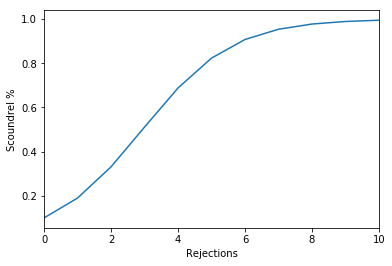

In [45]:
scoundrel = count_bayes(.10, .95, .45)

scoundrel.plot()
plt.xlabel('Rejections')
plt.ylabel('Scoundrel %');

It would take about 10 rejections for him to be justified in changing his mind!

Now let's say Bob meets Alice and they hit it off. But a week later, she doesn't return a text message. Bob doesn't panic, but then she doesn't return a text the next day either.

How many ignored texts should Bob send before he "takes the hint"?

- **Prior that Alice likes Bob: 90%** (They had a great date!)
- **Probability of an ignored text if she likes him: 20%** (People get busy sometimes.)
- **Probability of an ignored text if she doesn't like him: 60%** (Even if she doesn't like him, there's a good chance she'd text him to let him know.)

texts = count_bayes(.90, .20, .60)

texts.plot()
plt.xlabel('Texts not returned')
plt.ylabel("Probability she likes him")

My advice to Bob would be 3 texts. This would give him about 75% certainty without him having to keep pestering her.

# Final example

The new guy is late on his first day! How many more times should we tolerate this behavior before concluding that we hired a dud?

Subjective probabilties (as usual:

- Probability of making a bad hire: 20%
- Probability a bad hire would be late: 75%
- Probability a good hire would be late: 5%

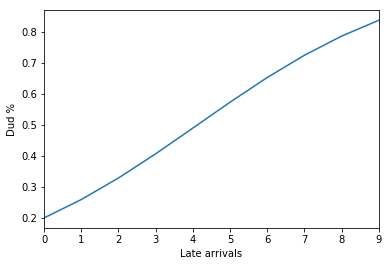

In [49]:
hired_a_dud = count_bayes(.2, .70, .5, thresh=.8)

hired_a_dud.plot()
plt.xlabel('Late arrivals')
plt.ylabel('Dud %');

It would actually take 9 or so late arrivals before you could form a conclusion with any reasonable level of certainty. I hope this illustrates why you should be VERY hesitant to draw conclusions from 1-off or 2-off events. There are a LOT of coincidences in life.

**But also consider:**

You can continuously change your prior based on other evidence. Maybe he "forgets" about a task he was responsible for, and your prior of him being a bad hire jumps from 20% to 75% based on that alone.

You shouldn't feel any skepticism towards Bayes' Theorem; it's practically bulletproof. If you're not getting results that make sense to you, then you need to adjust your input probabilities. Your prior is typically the most likely culprit.